In [222]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import matplotlib.dates as mdates
from datetime import datetime

In [226]:
#Function

In [223]:
def tempplot():
    df = pd.read_csv('data/C2A2_data/BinSize_d400.csv')
    locations = df[list(
        map(lambda x: x.startswith('KZ'), df['ID']))]
    
    Astana_hash = locations[locations['NAME']=='ASTANA'].hash[4978]
    df1 = pd.read_csv(f'data/C2A2_data/BinnedCsvs_d400/{Astana_hash}.csv')
    df1 = df1.sort_values(by=['Date']).reset_index()
    df1 = df1.merge(df1.Date.str.extract(r'(\d*)-(\d*-\d*)').rename(columns={0:'Year', 1:'Month_Date'}), left_index=True, right_index=True, how='outer').drop(['index','ID'], axis=1)
    df1 = df1.query("Month_Date!='02-29'")
    data2014 = df1.query("Year != '2015'")
    data2015 = df1.query("Year == '2015'")
    tmax2014 = data2014.query("Element=='TMAX'").groupby("Month_Date").mean()
    tmin2014 = data2014.query("Element=='TMIN'").groupby("Month_Date").mean()
    tmax2015 = data2015.set_index('Month_Date').query("Element=='TMAX'")
    tmin2015 = data2015.set_index('Month_Date').query("Element=='TMIN'")
    in2015max = tmax2014[tmax2014.index.isin(tmax2015.index)]
    in2015min = tmin2014[tmin2014.index.isin(tmin2015.index)]
    tmax2015 = tmax2015[tmax2015['Data_Value'] > in2015max['Data_Value']]
    tmin2015 = tmin2015[tmin2015['Data_Value'] < in2015min['Data_Value']]
    tmax2015= tmax2015.reset_index()
    tmin2015= tmin2015.reset_index()
    tmax2014=tmax2014.reset_index()
    tmin2014=tmin2014.reset_index()
    tmax2015['Month_Date'] = tmax2015.Month_Date.apply(lambda x: datetime.strptime(x, '%m-%d'))
    tmin2015['Month_Date'] = tmin2015.Month_Date.apply(lambda x: datetime.strptime(x, '%m-%d'))
    tmax2014['Month_Date'] = tmax2014.Month_Date.apply(lambda x: datetime.strptime(x, '%m-%d'))
    tmin2014['Month_Date'] = tmin2014.Month_Date.apply(lambda x: datetime.strptime(x, '%m-%d'))
    tmax2015 = tmax2015.set_index('Month_Date')
    tmin2015 = tmin2015.set_index('Month_Date')
    tmax2014 = tmax2014.set_index('Month_Date')
    tmin2014 = tmin2014.set_index('Month_Date')
    month2015 = tmax2015.index.to_series().apply(lambda x: x.strftime("%B")).tolist()
    month2014 = tmax2014.index.to_series().apply(lambda x: x.strftime("%B")).tolist()


    locator = mdates.MonthLocator() 
    fmt = mdates.DateFormatter('%b')


    plt.figure(figsize=(20,12))
    plt.plot( tmin2014.Data_Value, '-',  tmax2014.Data_Value, '-')
    plt.plot( tmax2015.Data_Value, 'r.' , tmin2015.Data_Value, 'b.')

    plt.legend(['Mean minimum temperature 2005-2014', 'Mean maximum temperature 2005-2014', 'maximum broken temperature in 2015', 'minimum broken temperature in 2015'])

    plt.gca().fill_between(tmin2014.index, tmin2014['Data_Value'], tmax2014['Data_Value'], facecolor = 'gray', alpha =.25)


    plt.xlabel('Month')
    plt.ylabel('Degrees (C)')
    plt.title('2015 vs 2005-2014 temperature in Astana, Kazakhstan')


    X = plt.gca().xaxis
    X.set_major_locator(locator)
    # Specify formatter
    X.set_major_formatter(fmt)
    plt.show()

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:9: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)


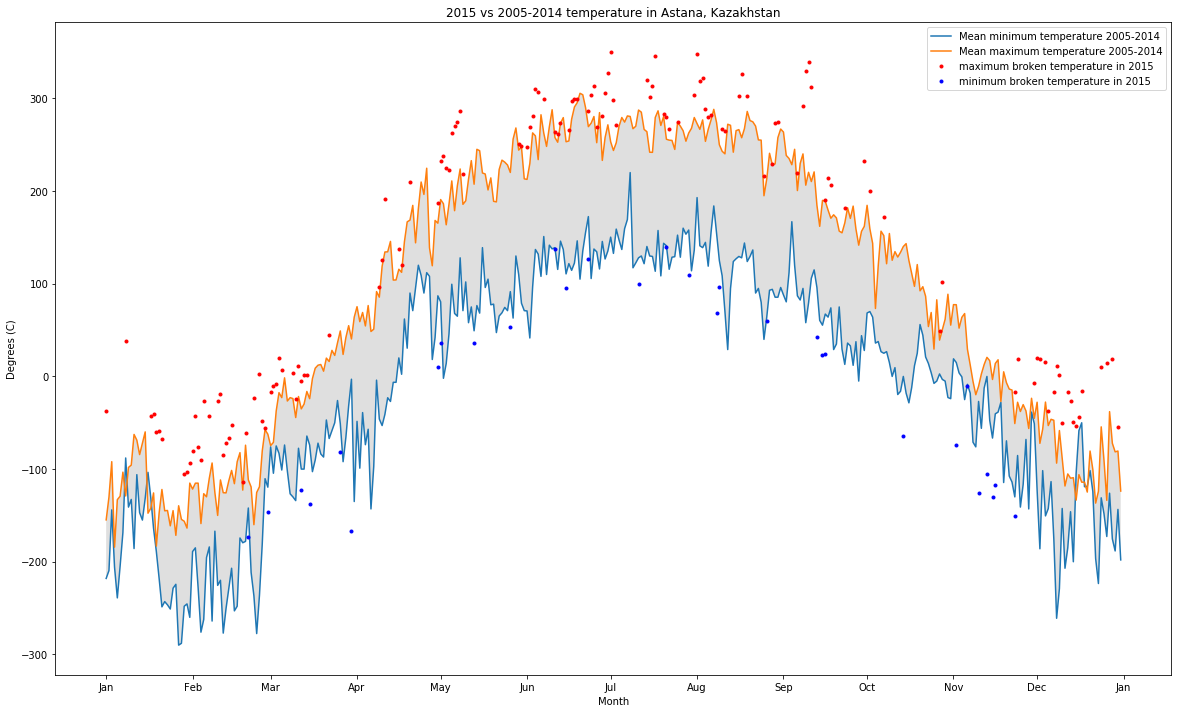

In [224]:
tempplot()